In [55]:
using GeoStats

In [56]:
?GeoDataFrame

search: GeoDataFrame



```
GeoDataFrame(data, coordnames)
```

A dataframe object `data` with additional metadata for tracking the columns `coordnames` that represent spatial coordinates.

## Examples

If the data was already loaded in a normal DataFrame `data`, and there exists columns named `x`, `y` and `z`, wrap the data and specify the column names:

```julia
julia> GeoDataFrame(data, [:x,:y,:z])
```

Alternatively, load the data directly into a `GeoDataFrame` object by using the method [`readgeotable`](@ref).

### Notes

This type is a lightweight wrapper over Julia's DataFrame types. No additional storage is required other than a vector of symbols with the columns names representing spatial coordinates.


In [57]:
using CSV

In [77]:
X_all=Matrix(CSV.read("x_shuffled.csv",header=0))
y_all=vec(Matrix(CSV.read("y_shuffled.csv", header=0)))

400-element Array{Float64,1}:
 264432.25520764623       
 167688.41183851557       
 670549.1309412513        
 115919.8530580652        
 693350.508694783         
 555560.1098441511        
 188442.96715840694       
 196862.60159301193       
 481180.30510619          
 853647.0166223499        
 580936.4451294354        
 480871.4034428356        
 855955.6781931772        
      ⋮                   
 534234.1675322347        
 549584.2680083631        
 397004.1057001574        
 410824.6893967921        
 102427.80128575808       
 317454.0032188951        
 432703.8716610953        
 207019.8774613448        
      1.1939538005072905e6
 586269.1259098226        
 786013.4761361814        
 859230.0453506851        

In [81]:
X_train=X_all[1:300,:]
y_train=y_all[1:300]

300-element Array{Float64,1}:
 264432.25520764623      
 167688.41183851557      
 670549.1309412513       
 115919.8530580652       
 693350.508694783        
 555560.1098441511       
 188442.96715840694      
 196862.60159301193      
 481180.30510619         
 853647.0166223499       
 580936.4451294354       
 480871.4034428356       
 855955.6781931772       
      ⋮                  
 396801.95264317875      
 115684.45379602977      
 207408.5438973958       
 241223.6170499474       
 274185.8344435944       
      1.520287439001148e6
 371262.97747558105      
 453453.30194002483      
 250841.83928940955      
 748202.5476966833       
 123222.96428520135      
 672021.531663523        

In [145]:
function normalize_matrix(matrix)
    matrix_new = matrix
    for (i,_) in enumerate(matrix[1,:])
        matrix_new[:,i]=matrix[:,i].-minimum(matrix[:,i])
        matrix_new[:,i]=matrix_new[:,i]./maximum(matrix_new[:,i])
    end
    return matrix_new
end

normalize_matrix (generic function with 1 method)

In [146]:
X_all_norm=normalize_matrix(X_all)

400×15 Array{Float64,2}:
 0.325524  0.950538  0.357411   0.389105   …  0.616287  0.305131    0.165657 
 0.652948  0.704087  0.861773   0.837654      0.631708  0.660561    0.518479 
 0.290786  0.383286  0.833265   0.9898        0.337034  0.442042    0.0338813
 0.749271  0.479017  0.0575158  0.904464      0.708453  0.545701    0.448983 
 0.60662   0.653666  0.589511   0.0862952     0.598314  0.859845    0.214738 
 0.657132  0.329131  0.215921   0.33697    …  0.543194  0.185986    0.314512 
 0.287145  0.397668  0.518124   0.920083      0.428322  0.239789    0.514247 
 0.677486  0.642819  0.279754   0.225433      0.487099  0.737915    0.0592817
 0.482049  0.555148  0.955058   0.503599      0.587627  0.23451     0.17101  
 0.335434  0.281389  0.618836   0.666675      0.714444  0.576413    0.0776534
 0.458438  0.735938  0.266868   0.106359   …  0.331804  0.756263    0.295403 
 0.310861  0.412033  0.303915   0.419046      0.394073  0.00192811  0.319251 
 0.576896  0.294779  0.96941    0.75033

In [147]:
X_train_norm=X_all_norm[1:300,:]

300×15 Array{Float64,2}:
 0.325524  0.950538  0.357411   …  0.616287  0.305131    0.165657  
 0.652948  0.704087  0.861773      0.631708  0.660561    0.518479  
 0.290786  0.383286  0.833265      0.337034  0.442042    0.0338813 
 0.749271  0.479017  0.0575158     0.708453  0.545701    0.448983  
 0.60662   0.653666  0.589511      0.598314  0.859845    0.214738  
 0.657132  0.329131  0.215921   …  0.543194  0.185986    0.314512  
 0.287145  0.397668  0.518124      0.428322  0.239789    0.514247  
 0.677486  0.642819  0.279754      0.487099  0.737915    0.0592817 
 0.482049  0.555148  0.955058      0.587627  0.23451     0.17101   
 0.335434  0.281389  0.618836      0.714444  0.576413    0.0776534 
 0.458438  0.735938  0.266868   …  0.331804  0.756263    0.295403  
 0.310861  0.412033  0.303915      0.394073  0.00192811  0.319251  
 0.576896  0.294779  0.96941       0.664093  0.277847    0.173671  
 ⋮                              ⋱                                  
 0.500699  0.537482  0.

In [82]:
function normalize_df(dataframe)
    df=dataframe
    for name in names(dataframe[1:15])
        df[name] = dataframe[name].-minimum(dataframe[name])
        df[name] = df[name]./maximum(df[name])
    end
    return df
end
    

normalize_df (generic function with 1 method)

In [156]:
gamma1=EmpiricalVariogram(X_train,y_train)

EmpiricalVariogram([6.070067482033012e8, 1.8210202446099038e9, 3.035033741016506e9, 4.2490472374231086e9, 5.463060733829711e9, 6.677074230236314e9, 7.891087726642917e9, 9.105101223049519e9, 1.0319114719456121e10, 1.1533128215862724e10, 1.2747141712269327e10, 1.3961155208675928e10, 1.5175168705082531e10, 1.6389182201489134e10, 1.7603195697895737e10, 1.8817209194302338e10, 2.0031222690708942e10, 2.1245236187115543e10, 2.245924968352215e10, 2.367326317992875e10], [6.7262193206467834e10, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [91, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [157]:
gamma2=EmpiricalVariogram(X_train_norm,y_train)

EmpiricalVariogram([0.08781919022760766, 0.263457570682823, 0.4390959511380383, 0.6147343315932536, 0.7903727120484689, 0.9660110925036842, 1.1416494729588995, 1.3172878534141148, 1.4929262338693303, 1.6685646143245456, 1.844202994779761, 2.019841375234976, 2.1954797556901915, 2.371118136145407, 2.546756516600622, 2.7223948970558376, 2.8980332775110527, 3.073671657966268, 3.2493100384214832, 3.4249484188766988], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
theoretical = Variography.fit(SphericalVariogram, gamma2)

ArgumentError: ArgumentError: reducing over an empty collection is not allowed

In [116]:
ok = OrdinaryKriging(adjoint(X_train),y_train,theoretical)

KrigingEstimators.FittedKriging{OrdinaryKriging{SphericalVariogram{Float64,Distances.Euclidean}},KrigingEstimators.KrigingState{Float64,Float64,LinearAlgebra.Adjoint{Float64,Array{Float64,2}},Array{Float64,1},LinearAlgebra.LU{Float64,Array{Float64,2}},Float64}}(OrdinaryKriging{SphericalVariogram{Float64,Distances.Euclidean}}(SphericalVariogram{Float64,Distances.Euclidean}
  range: Float64 3.2946662898886776e8
  sill: Float64 6.726219320646783e10
  nugget: Float64 3.2357932797945004e10
  distance: Distances.Euclidean
), KrigingEstimators.KrigingState{Float64,Float64,LinearAlgebra.Adjoint{Float64,Array{Float64,2}},Array{Float64,1},LinearAlgebra.LU{Float64,Array{Float64,2}},Float64}([2.5517504e9 2.977928704e9 … 2.992654336e9 2.398543872e9; 0.37270960211753845 0.34937259554862976 … 0.3381301462650299 0.3338361978530884; … ; 292.7633056640625 293.4721374511719 … 293.5047607421875 292.8464660644531; 2.4051436301541415e-20 6.428909113073219e-20 … 4.880736552868805e-20 4.239224383621547e-20], 

In [139]:
function prediction(X)
    meanval=X[:,1]
    for (i, _) in enumerate(X[:,1])
        meanval[i], sigma = predict(ok,X[i,:])
    end
    return meanval
end

prediction (generic function with 1 method)

In [140]:
μ = prediction(X_all)

400-element Array{Float64,1}:
 264432.255207646  
 167688.411838515  
 670549.1309412511 
 115919.85305806519
 693350.5086947829 
 555560.109844151  
 188442.96715840686
 196862.601593012  
 481180.3051061902 
 853647.0166223499 
 580936.445129435  
 480871.4034428355 
 855955.6781931773 
      ⋮            
 456256.8122958507 
 565802.4278368937 
 414163.08522705873
 521355.90737576777
 494060.29008716834
 341188.0821535221 
 467785.54500648996
 509625.4816023401 
 566061.1781555831 
 508410.77045980486
 550716.820616945  
 411950.63263809937

In [73]:
using Plots

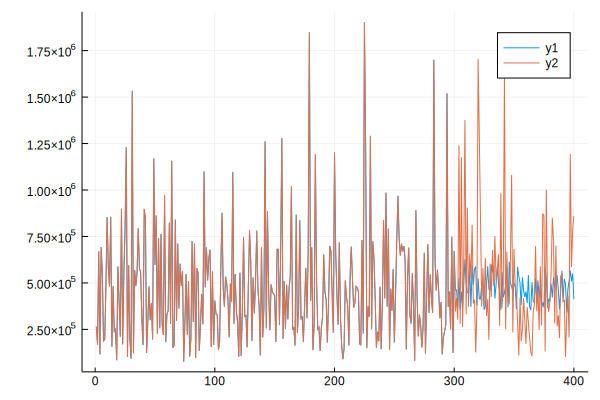

In [141]:
plot([μ,y_all])

In [75]:
using DataFrames
df=DataFrame()
df.A =1:400
df.B =μ
CSV.write("y_predict_julia_geostats.csv",df, writeheader=false)

"y_predict_julia_geostats.csv"